In [77]:
#Here we are going to import the libraries we will need for the task
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score
digits = load_digits()

In [59]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


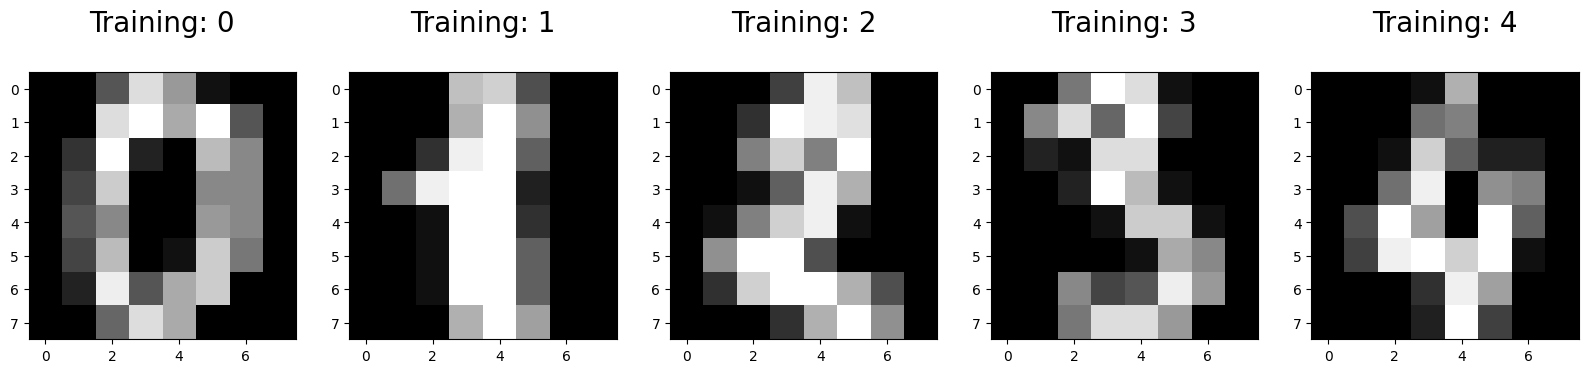

In [60]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Training and testing Sets purpose**
The training set is used to train the machine learning model. The model learns from this data by adjusting its parameters to minimize errors and make accurate predictions.
The test set is used to evaluate the performance of the trained model. It assesses how well the model generalizes to new, unseen data.

In [61]:
#Input matrix and target vertor set up
X = digits.data
y = digits.target

#Splittingg into trainig and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
#now i an going to check the dimentions of the objects
print("Training inputs shape:",X_train.shape)
print("Training outputs shape:",y_train.shape)  

Training inputs shape: (1437, 64)
Training outputs shape: (1437,)


**Building the Classification Model**

In [63]:
from sklearn.ensemble import RandomForestClassifier
#
clf = RandomForestClassifier(random_state = 42)


**Parameter to tune**
in this case i amd going to chosse "min sample split" to tune because Tuning the min_samples_split parameter is crucial for controlling the complexity of decision trees and ensemble models. It helps in preventing overfitting, balancing the bias-variance trade-off, improving computational efficiency, and enhancing model stability. By carefully selecting the right value for min_samples_split, you can significantly improve the generalization and performance of your model.

In [64]:
#Parameter grid set up
param_grid = {
      'min_samples_split': [2,4,6,8,10,15,20,25,30,40,50]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)

#Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_split': [2, 4, 6, 8, 10, 15, 20, 25, 30,
                                               40, 50]})

Value selection which will be used during testing on the test data
In this case we are going to use the value 2 as it is the value that returned the best performance after performing the grid search


In [65]:
best_params = grid_search.best_params_
best_params

{'min_samples_split': 2}

In [66]:
#setting the random classifier to the best parameter
clf = RandomForestClassifier(min_samples_split=best_params['min_samples_split'], random_state=42)

#fitting the classifier onto the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Creating the confusion Matrix**


In [67]:
#Model predictions
y_pred = clf.predict(X_test)
y_pred


array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

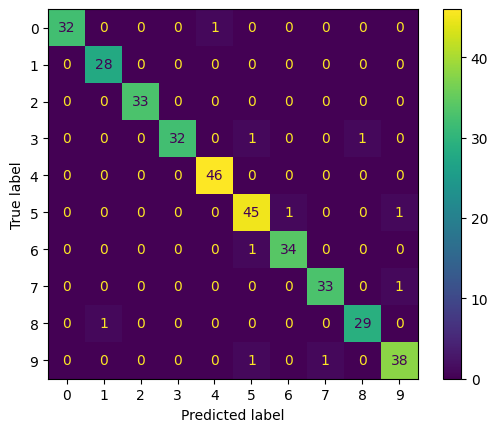

In [74]:
labels = digits.target_names
#labels
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

The model performed great as there are not large miss classifications. 

In [79]:
#Accuracy, precision, recall, f1-score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = "macro")
f1,recall,precision,accuracy

(0.9732067700933176,
 0.9727003722185199,
 0.9740424119023985,
 0.9722222222222222)

The model has performed very well as all the scores are above 95%